**Research Question:**

What is the impact of monetary compensation on customer satisfaction during complaint mediation in the New York City consumer services industry?

This research question focuses on examining the relationship between monetary compensation and customer satisfaction in the context of complaint mediation within the consumer services industry in New York City.

**Justification:**

Understanding the factors that influence consumer satisfaction and dissatisfaction in mediated complaint cases is essential for businesses and regulatory authorities. It can help businesses improve their services, reduce complaints, and enhance customer satisfaction.
For regulatory authorities, this analysis can provide insights into industries or business practices that frequently lead to consumer dissatisfaction, allowing for better enforcement of consumer protection laws.
This research can contribute to improved customer experiences, fewer legal disputes, and better relationships between businesses and consumers.

**Data Sources:**

The data for this analysis was found online and is publicly available on the New York City Open Data website.
You can access the [Consumer Services Mediated Complaints Dataset](https://data.cityofnewyork.us/Business/Consumer-Services-Mediated-Complaints/nre2-6m2s) on the official New York City Open Data website.

 The dataset provides information on consumer services mediated complaints in New York City.


**Libraries Potentially Being Used:**

pandas for data manipulation and analysis.

numpy for numerical operations.

xgboost and RandomForestClassifier for machine learning.

sklearn for model selection and evaluation.

matplotlib and seaborn for data visualization.

plotly.express for interactive visualizations.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px


**EDA and Summary Statistics:**



In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/waheeb123/Datasets/main/Consumer_Services_Mediated_Complaints_20231023.csv")
df.head()

,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Restitution,Business Building,Business Street,Building Address Unit,Business City,Business State,Business Zip,Complainant Zip,Longitude,Latitude
0,DOLLAR MAGIC LLC,Misc Non-Food Retail - 817,Surcharge/Overcharge - S02,09/19/2014,10/08/2014,Credit Card Refund and/or Contract Cancelled -...,Yes,2.00,2050,LEXINGTON AVE,NaN,NEW YORK,NY,10035,10002,NaN,NaN
1,"CHARLES P. ROGERS & CO., INC.",Furniture Sales - 242,Billing Dispute - B02,09/29/2020,10/15/2020,Advised to Sue - ATS,No,0.00,26,W 17TH ST,NaN,NEW YORK,NY,10011,07605,NaN,NaN
2,INTERNATIONAL TOWING & RECOVERY INC.,Tow Truck Company - 124,Misrepresentation - M01,06/11/2021,07/08/2021,Cash Amount - AMT,Yes,250.00,21525,99TH AVE,NaN,QUEENS VLG,NY,11429,11801,-73.743803,40.714552
3,XIOS,Wearing Apparel - 450,Exchange Goods/Contract Cancelled - E01,02/19/2015,04/08/2015,Complaint Invalid - CIN,NaN,0.00,54,GRAHAM AVE,NaN,BROOKLYN,NY,11206,11206,-73.942421,40.702664
4,FARFAN MARITZA,Employment Agency - 034,Exchange Goods/Contract Cancelled - E01,10/22/2019,11/12/2019,Cash Amount - AMT,Yes,130.00,8912,ROOSEVELT AVE,BSMT,JACKSON HEIGHTS,NY,11372,11420,-73.877552,40.748297


In [3]:
df.describe()

,Longitude,Latitude
count,13890.000000,13890.000000
mean,-73.923504,40.725574
std,0.087303,0.080899
min,-77.519854,40.112489
25%,-73.981322,40.668737
50%,-73.927984,40.733847
75%,-73.867283,40.767007
max,-73.700715,40.910679


It's common to use df.describe() to obtain summary statistics for numerical columns, but this method doesn't provide the same type of summary for categorical (object) columns. So we have to get summary statistics for those columns. It's a good approach for understanding the distribution of categorical variables.

In [4]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)
df[categorical].describe()

Index(['Business Name', 'Industry', 'Complaint Type', 'Mediation Start Date',
       'Mediation Close Date', 'Complaint Result', 'Satisfaction',
       'Restitution', 'Business Building', 'Business Street',
       'Building Address Unit', 'Business City', 'Business State',
       'Business Zip', 'Complainant Zip '],
      dtype='object')


,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Restitution,Business Building,Business Street,Building Address Unit,Business City,Business State,Business Zip,Complainant Zip
count,23524,24294,22354,24293,24294,24294,20272,24294,22563,22154,4311,22626,22627,22627,22279
unique,12730,83,72,1745,2382,26,3,1783,4924,3374,944,849,47,1299,1852
top,P.C. RICHARD & SON LONG ISLAND CORPORATION,Home Improvement Contractor - 100,Misrepresentation - M01,04/01/2022,09/02/2014,Advised to Sue - ATS,Yes,0.00,PO BOX,BROADWAY,2,NEW YORK,NY,10001,11234
freq,160,4015,3217,71,31,4230,12244,17136,475,496,286,4658,18958,486,329


In [5]:
# business percentages
top_industries = df['Industry'].value_counts(normalize=True) * 100

top_industries.head(10)

Home Improvement Contractor - 100    16.526714
Misc Non-Food Retail - 817            8.829341
Furniture Sales - 242                 8.635877
Electronic Store - 001                8.253067
Tow Truck Company - 124               7.956697
Secondhand Dealer Auto - 005          7.656211
Debt Collection Agency - 122          7.285750
Garage - 049                          4.651354
Other                                 3.091298
Dry Cleaners - 230                    2.082819
Name: Industry, dtype: float64

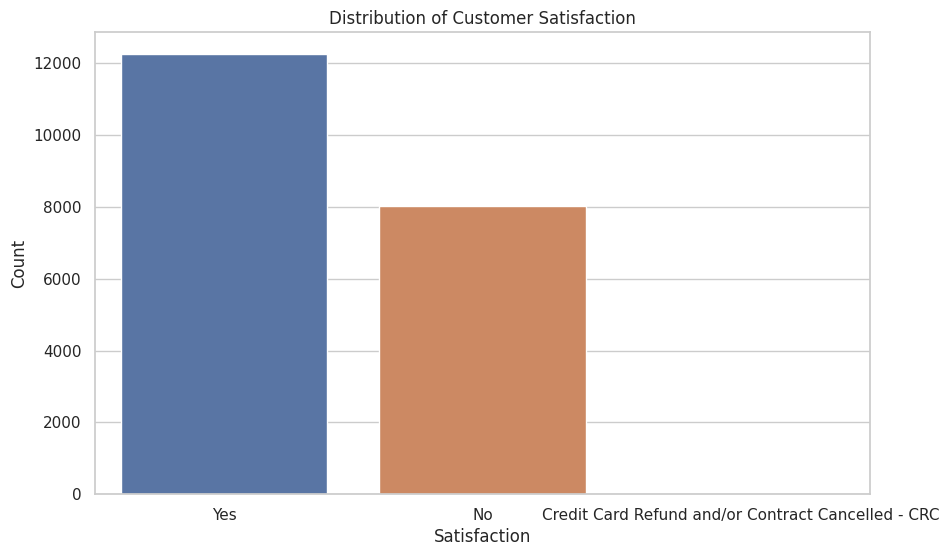

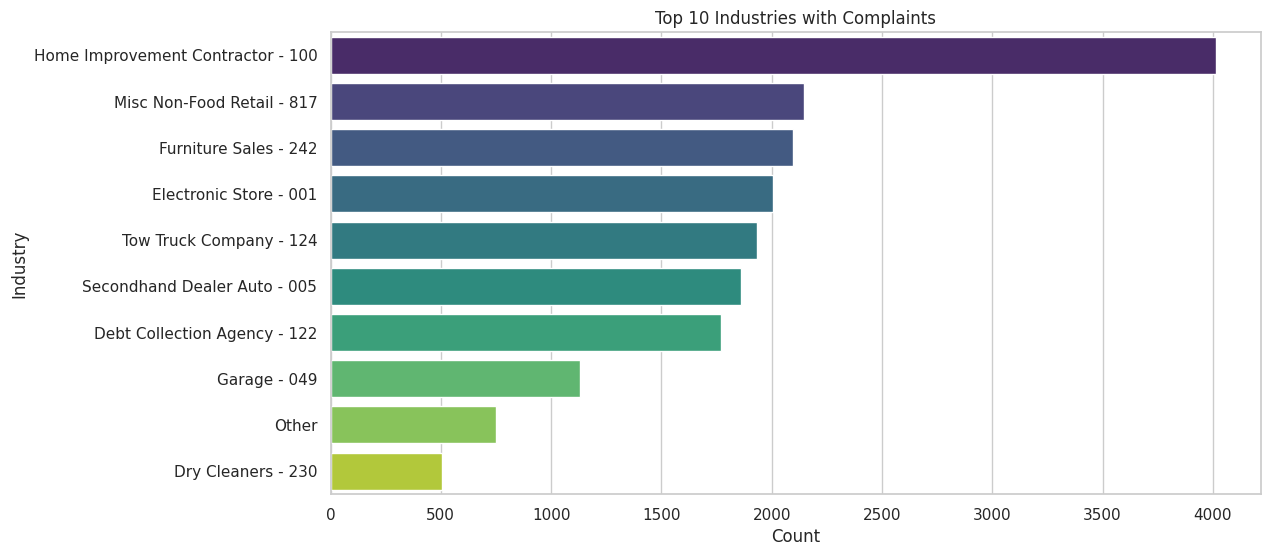

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plot distribution of 'Satisfaction'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Satisfaction')
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

# Plot a bar chart for the top industries
top_industries = df['Industry'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_industries, y=top_industries.index, palette='viridis')
plt.title('Top 10 Industries with Complaints')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()


# Create a scatter plot of Longitude and Latitude
fig = px.scatter(df, x='Longitude', y='Latitude', title='Geospatial Distribution of Complaints')
fig.show()
